# Characterising one dimensional distributions

Let's start with the simple case, where we just have one data vector. You've seen this one before too, its from the EDA examples to keep it even simpler!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

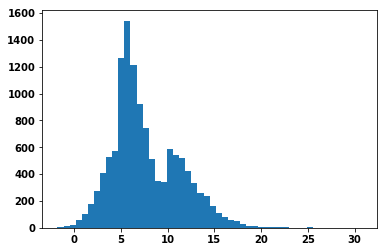

In [2]:
data = np.loadtxt("dataset.txt")
plt.hist(data, bins=50);

Okay, so the first thing we can do is try and get some metrics for the center of the distribution. Much of this section may not be ground-breaking for those watching, so let's power through it.

# Measures of Centrality

### Mean

If we have a set of points N points denoted $x_i$, the mean is defined as

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A way to manually compute the mean is given by:

In [4]:
#manual way to get mean
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)
print(get_mean([3, 5, 2, 6]))

4.0


But in this modern age we shouldn't have to write the function ourself. We can use `np.mean`. If we want datapoints to have different weights, we can use `np.average` instead. (For example, dice rolling might only record the value and number of times, not each individual roll).

In [5]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


### Median

Sort all your data and take out the middle element. Thats your median. `[1,3,5,7,7]` has a median of `5`. Here's how we can manually find the median:

In [6]:
#manual way to get median
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])
print(get_median([7, 7, 3, 1, 4, 5]))

4.5


Note in the case where there isn't a single middle element, we average the two in the middle.

Don't use this function though, use `np.median`

In [7]:
median = np.median(data)
print(median)

6.7325


Also, it is good to point out that median can often be *more* useful than the mean, because it is less sensitive to outliers and bad data. Consider this:

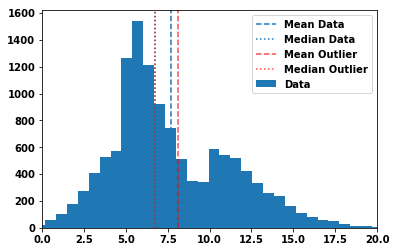

In [8]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

### Mode

Another outlier insensitive method, it returns to us the value which is most common. **This works for discrete distributions only... sort of.** If you have a continuous distribution, you will need to bin the data first. For example, the mode of `[1,7,2,5,3,3,8,3,2]` is `3`, because three shows up more than any other number. Here is a manual mode function:

In [9]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]
print(get_mode([1,7,2,5,3,3,8,3,2]))

3


Yes, I know I'm sort of cheating by using `numpy` to simplify, but who wants me to write out all the code to manually count things up. If you want to give it a shot yourself, I'd recommend using a dictionary to store `{value: count}` pairs.

In [10]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


You can see its not very useful. We got lucky by have two values... not a very good mode. We should bin the data (make a histogram of it) and retun the bin which has the most values in it. But then we have to pick the number of bins, bin edges, etc, etc, and we sort of lose the point. 

In [11]:
hist, edges = np.histogram(data, bins=100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


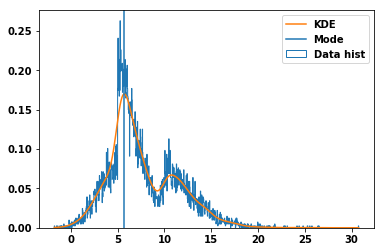

In [12]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=1000, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

# Comparison

Here is a comparison between mode, median and mean for the dataset:

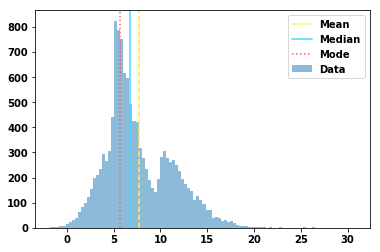

In [13]:
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c='#f9ee4a')
plt.axvline(median, label="Median", ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();

# Measures of width and balance

* Variance
* Standard deviation
* Skewness
* Kurtosis

### Variance

The variance of a distrbution is a measure of how much it spreads out around the mean. A touch more formally, its the expected value of the squared deviation from the mean. Even more formally, it is given by 

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

where $\mu$ is the mean of the dataset $x$, as described in the previous section. Note there is a fine point about whether you should divide by $N$ or $N-1$. Here is a manual way of calculating it:

In [14]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)
print(get_variance([1,2,3,4,5]))

2.5


In [15]:
variance = np.var(data, ddof=1)
print(variance)

13.137626632694301


### Standard deviation

This one is simple. Its the square root of the variance. So its the expected absolute value of the deviation from the mean. And we can use `np.std` for it or `pd.DataFrame.std` ([doco here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html))

In [16]:
std = np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


### Our powers combined

Welcome to the Gaussian approximation! Also known as a normal approximation. Check it out:

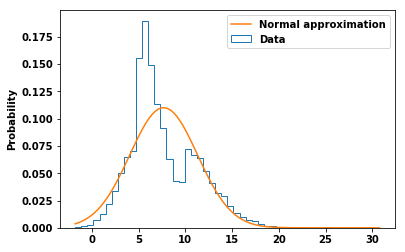

In [17]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal approximation")
plt.legend()
plt.ylabel("Probability");

Its not *too* bad, but its not the best thing either. It seems like our data isn't perfectly symmetrical, so lets quantify how asymmetrical it is.

### Skewness

In this section I might drop the word "moment" a few times. There are some standardised ways of quantifying "moments". The first moment is zero by definition. The second is variance. The third is skewness, which is often defined as $\gamma_1$.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$

In [19]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
print(get_skewness([1,2,3,4,5]))

0.0


In [20]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


Let's update our normal approximation to a skewed normal approximation and see how it looks, just for fun.

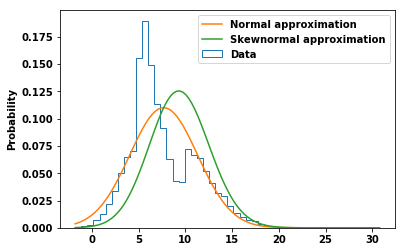

In [21]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

Oh no, this doesn't look better? Where did we go wrong?

A skew normal cant just be given the mean and standard deviation of a normal and expected to work. The skewness modifies the mean and standard deviation. You need to actually fit.

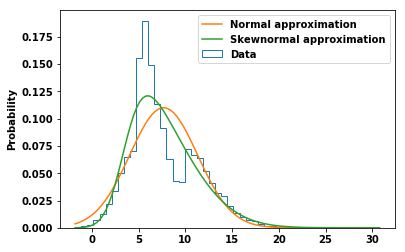

In [22]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

### Kurtosis

The next moment, and the last one we'll consider is kurtosis. It has a similar definition, and is often represented as $\kappa$ or $\gamma_2$:

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

In [23]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / (len(xs))) / (var ** 2)
print(get_kurtosis([1,2,3,4,5]))

1.7


In [24]:
kurtosis = st.kurtosis(data, fisher=False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


`fisher` hey? So this is just a normalisation thing and because there are multiple definitions of kurtosis. With `fisher=False`, a normal distrubtion has a kurtosis of 3. With `fisher=True`, scipy subtracts 3 from the result so that a normal distribution would have a kurtosis of 0. Lots of things are compared to normal distributions, so having all the moments be 0 for them is handy. If you're curious about this, the difference is between "kurtosis" and "excess kurtosis", will help which will hopefully help when googling!

# When analytics fail

At the moment we've been coming up with ways to quantify our data distribution such that we could try and reconstruct something approximately the same using various analytic distributions, like the normal distribution. So what happens if that isn't going to be good enough?

### Percentiles

What if we - instead of using a mean or other such numbers - simply turned our long data vector down into a few points representing different percentiles? We could essentially reconstruct our data distribution to an aribtrary accuracy and never worry about analytic functions.



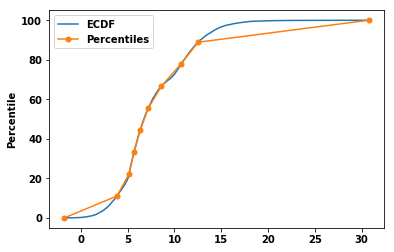

In [26]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data)) #len is saying how many points we want

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

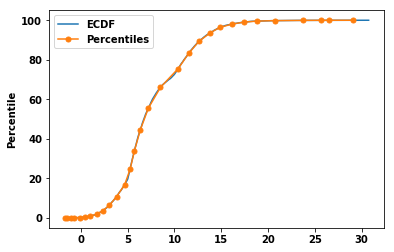

In [27]:
ps = 100 * st.norm.cdf(np.linspace(-4, 4, 30))
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

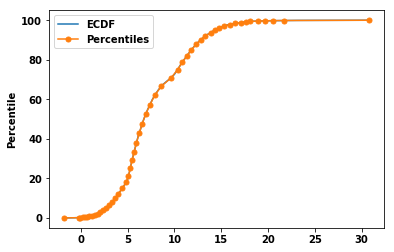

In [28]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100]))  # There is a bug in the insert way of doing it, this is better
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

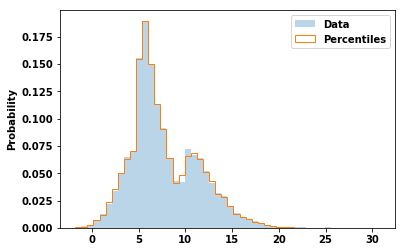

In [29]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();

Look at how nice those tails are now! And you can see that if we increased the number of samples in our second percentiles to around a hundred and we could very accurately describe our 1D distribution. And 100 data points are much faster to transfer than thousands of them.